# Load MNIST Data

In [35]:
# Dataset is represnted as D = {xi,yi} where i = 1 to n ;ie..(collection of datapoints(xi) and class labels(yi))
# xiERd ..  R: real space; d means dimensions - 4 ( features in case of Iris)
# xi:  column vector(default) - [PL,PW,SL,SW] in case of iris dataset
# yi: [setosa, versicular,virginica]

In [2]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# MNIST Dataset - 784 dimensions.. High Dimension Data Visualization of hand written digits
# D = {xi,yi} i= 1-60K data points(training set); xi -image of 28*28 pixels; yi - (0,1...9)
# Task/Obj: classify written char into one 0f 10 numeric char
# EACH Xi is in image form---> 
# convert to matrix form of size(28*28)----> 
# convert it to column vector by row flattening(784*1)
# so as a whole.. X = xi(60k*784), yi(60k*1)
# as we cant visualize 784 dimensions.. convert it to 2-D usin t-SNE/PCA

In [3]:
d0 = pd.read_csv('mnist_train.csv')  ## Images of size 28*28
d0.shape

(42000, 785)

In [4]:
d0.head()
l = d0['label']
d = d0.drop('label',axis =1)
d.shape

(42000, 784)

In [5]:
l.shape

(42000,)

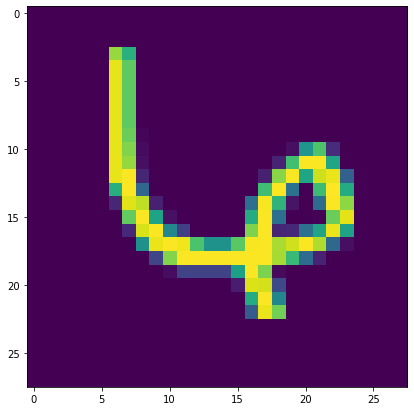

6


In [6]:
# check the visual image for few data points
plt.figure(figsize= (7,7))
img = d.iloc[89].to_numpy().reshape(28,28)
# d.iloc[x].values.reshape(28,28)
plt.imshow(img)
plt.show()

print(l[89])


# Data Preprocessing: Col Standardization

In [42]:
## Data Preprocessing: -many methods one such is Column normalization used mostly for dimensionality reduction
# assume data in matrix with many features n many data points
# in column normalization.. we focus on all features with diff scales such as (height in cm,weight in kgs....)
# we transform all data in [0-1] irrespective of scales
# Data--->Preprocessing----> Data modeling
# how to do column normalization:
# take a column(feature) eg.. a1,a2,a3,..an
# a.max = maximum(ai)
# a.min = minimum(ai)
# ai-dash = (ai-a.min)/(a.max - a.min) such that v vl get  ..a1-dash,d2-dash..an-dash in [0-1]
# repeat this for all columns so that all data will have values in b/w 0 n 1
# if u plot it then in 2-D ..it vl b unit square
# if 3-D, hyper cube
# takes data from n-D space ----> after column normalization---> unit cube/unit square(compressing)


In [43]:
# Mean Vector : when u plot geomery b/w heights n weights, central loc at which mean of heights and mean of weights
#               joins -- mean vector
#  do component wise sum n take average - mean vector
# x1=[1,2];x2=[3,4]..xn=[2,6]    n= 3 let
# then x1+x2+..xn = [6,12]
# (1/n)[6,12] = [2,4] ---->mean vector 

In [44]:
## Data Processing : Column standardization ( used very often than column normalization)
# Column Normalization : Transforming the values of all features to [0,1]..ie.. data matrix contains all 0's n 1's
# Column Standardization : Transforming data of each feature(fj-let) such that mean(fj) = 0 n std(fj) = 1
#                           ie.. Standard normal variate(gaussian dist)Z~N(0,1)
# how to do column standardization:
# take a column(feature) eg.. a1,a2,a3,..an
# ai-dash = (ai-mean(ai))/std(ai)
# takes data from n-D space ----> after column standardization---> mean = 0, std = 1
# If u plot it geometrically.. mean/mean vector will move to origin;
#                              if std <1, expand it till 1 or if std>1,compress/squish it till 1
# Column Standardization is also called Mean Centering & Scaling

In [45]:
## Covariance of data matrix:
# Co-var of matrix X is  a square symmetric matrix of size d*d named as S
# n data points(1,2,3..i...n) and d features(f1,f2.fj..fd)..; fj: column vector for jth feature
# Sij = jth feature for ith data point
# Sij = cov(fi,fj) here fi n fj are column vectors
# Cov(f1,f2) = (1/n)[xi-mean(f1)][yi-mean(f2)]
# let matrix X is col standardized.. then mean = 0, std = 1
# Cov(X) = (1/n) X^T.X only if X is column standardized
# S(d*d) = X^T(d*n).X(n*d)
# diagonal elements are variances ; non diagonal elements are co-variances

In [7]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(d)
np.mean(d[0:1].to_numpy())

21.2359693877551

# PCA from scratch:

In [47]:
# obj: find the new feature or characteristics or unit vector such that its variance is max
# Variance Maximization or Distance minimization 
# Compute eigen values and vectors usin covariance matrix(A transpose . A),
# if conversion is nD-3D, take top 3 figen vectors
# eigen vectors(vi) are perpendicular to each other
# PCA is not much useful if data is in the form of sin wave/circle/multiple clusters

In [48]:
# Find Co-variance matrix A: A^T.A
sample_data = std_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T,sample_data)

print(covar_matrix.shape) # square n symmetric matrix

(784, 784)


In [49]:
# find top two eigen values and vectors for projecting onto 2-D space

from scipy.linalg import eigh
values,vectors = eigh(covar_matrix,eigvals = (782,783))  ## 0,1,2,...783 in ascending order
print(vectors.shape)

vectors = vectors.T
print(vectors.shape) ## vector 1 represents 1st PC; vector 0 represents 2nd PC

(784, 2)
(2, 784)


In [50]:
# finding the new unit vector/axis in which variance will be maximum
new_co_ord = np.matmul(vectors,sample_data.T)
print('resultant new data points shape ',vectors.shape,' X ',sample_data.T.shape, ' is ',new_co_ord.shape)


resultant new data points shape  (2, 784)  X  (784, 42000)  is  (2, 42000)


In [51]:
# to plot the new feature and compare corresponding labels, 
#use vstack for attaching the label for each 2-d data point
new_co_ord = np.vstack((new_co_ord, l)).T

df = pd.DataFrame(data = new_co_ord, columns = ('PC-1','PC-2','label'))
print(df.head(5))


       PC-1       PC-2  label
0 -5.226445  -5.140478    1.0
1  6.032996  19.292332    0.0
2 -1.705813  -7.644503    1.0
3  5.836139  -0.474207    4.0
4  6.024818  26.559574    0.0


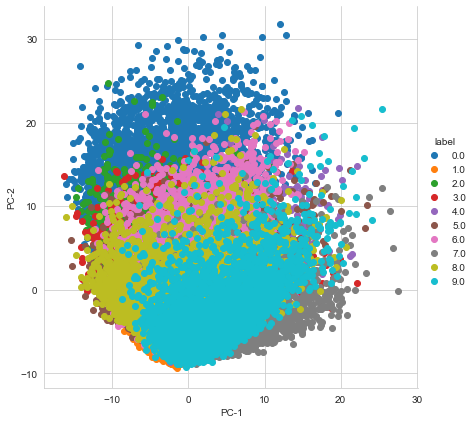

In [52]:
sns.FacetGrid(df, hue ='label',height = 6).map(plt.scatter,'PC-1','PC-2').add_legend()
sns.set_style('whitegrid')
plt.show()

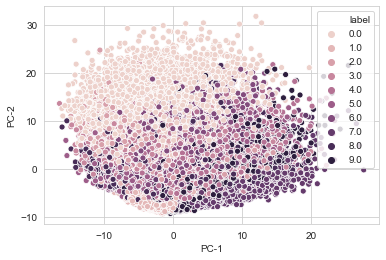

In [53]:
sns.scatterplot(x="PC-1",y="PC-2",legend="full",hue="label",data=df)

# PCA using Scikit-Learn

In [8]:
from sklearn.decomposition import PCA
pca = PCA()

In [9]:
pca.n_components  = 2
pca_data = pca.fit_transform(std_data)

In [13]:
pca_data.shape

(42000, 2)

In [12]:
# attaching the label for each 2-d data point 
data = np.vstack((pca_data.T,l)).T
data.shape


<class 'pandas.core.series.Series'>


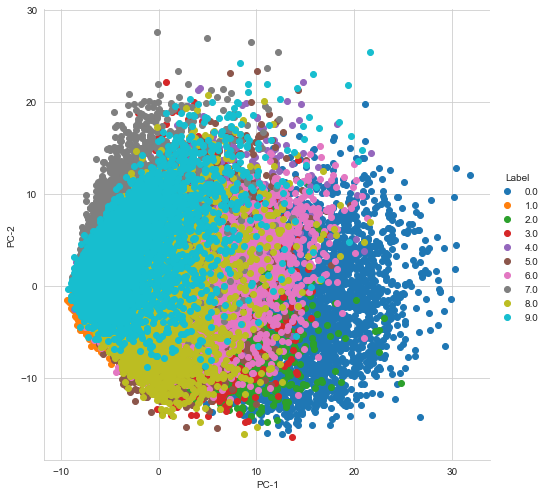

In [58]:
pca_df= pd.DataFrame(data,columns = ['PC-1','PC-2','Label'] )
sns.FacetGrid(pca_df,hue = 'Label',height = 7).map(plt.scatter,'PC-1','PC-2').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

In [59]:
## PCA for only dimensionality reduction but not visulaization ie..n-D to 4-D or 10-D or more
## used in ML

# for this, we need to find to which dim we need to convert such that variance will be max
# which dimension will give us 95% variance

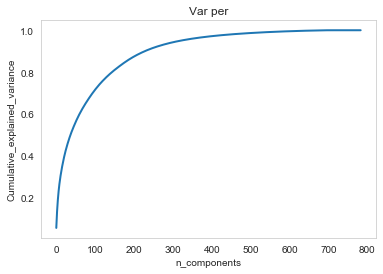

In [60]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.title('Var per')
#sns.set_style('whitegrid')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [61]:
## pca.explained variance means yigen values

# t-SNE using Scikit-Learn

In [62]:
# t-SNE - dimensionality reduction technique; prefers over PCA

# PCA vs t-SNE: 
# PCA preserves global shape/struct of data n hence data loss happens
# t-SNE preserves local shape/struct of data 

# Neighbourhood:
# in a high dim plot, if multiple points are plotted..then
# N(xi) = xj such that xi n xj are geometrically close to each other; 

# Embedding:
# for every point xi in high dim space..finding space in low dim space(2-D)  n placing xi-dash

# Geometric intitution:
# while embedding point(xi) from high-dim to 2-D..  
# it vl preserve the neighbourhood ie.. if d(x1,x2)~d(x1-dash,x2-dash) n it doesnt care abt farther points

# Crowding problem:
# from converting 2-D to 1-D, assume if 4 points on 2-D forms a square.. then preservin neighbourhood will go in error

# t-SNE: iterative alg(distill.pub)
# Parameters: 
# 1. Step - no.of.iterations
#    more no. of. iterations.. the better soln is(stability).. it vl not move aftr some iterations
# 2. perplexity - no. of neighbours that u need to preserve while convertin from d dim to d-dash dim
#      no of perplexity < no of data points
#      first , run t-SNE with multiple perplexity values keepin step as constant
#      next, keep perplexity constant n change step
#      now, keep both constant n run.. u can obs slihtly diff o/p each time
# epsilon: how fast it shud run
# t-SNE is not determined alg, it is probabilistic/stochastic bcz o/p varies each time..
# t-SNE is randomized alg
# t-SNE doesnot give any info on density/cluster size -->drawback 
# ie.. it expands dataset which is denser and it shrinks the dataset which is sparse
# t-SNE doesnot preserve distance b/w clusters--->drawback
# we cannot find any conclusions/structure with random data..so always..keep inc perplexity n run it multiple times
# never run t-SNE once
# how to find wen to stop inc perplexity n step?
# Re-run t-SNE with same perplexity n see if its shape is stable..if not, inc perplexity n run many times
# if shape is preserved with multiple runs of same perplexity..then it is right value
# default perplexity: 30
# default step:1000

# t-SNE: group points based on their visual similarity( visualizin high dim data) but it cannot give any other info
#        abt distance b/w clusters, variance,density,structure..
# may b after this, v vl apply any ML 

In [63]:
from sklearn.manifold import TSNE
print('before applying TSNE:',std_data.shape)

before applying TSNE: (42000, 784)


In [64]:
model =TSNE(n_components= 2,perplexity = 30,n_iter = 1000, random_state =0)
tsne_data = model.fit_transform(std_data)
tsne_data.shape

(42000, 2)

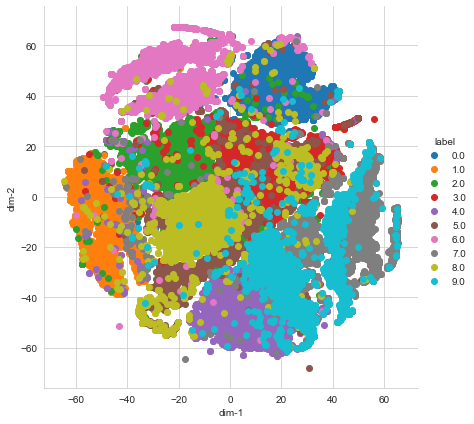

In [66]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,l)).T
df = pd.DataFrame(data= tsne_data, columns = ['dim-1','dim-2','label'])
sns.FacetGrid(df, hue = 'label',height = 6).map(plt.scatter,'dim-1','dim-2').add_legend()
plt.show()
        

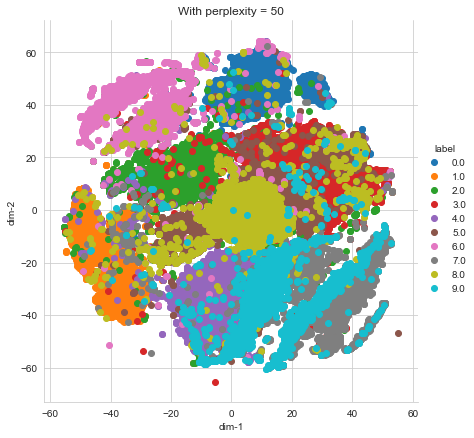

In [68]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(std_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,l)).T
df = pd.DataFrame(data= tsne_data, columns = ['dim-1','dim-2','label'])
sns.FacetGrid(df, hue = 'label',height = 6).map(plt.scatter,'dim-1','dim-2').add_legend()
plt.title('With perplexity = 50')
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(std_data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, l)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()